# Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [282]:
import re
import warnings

warnings.filterwarnings('ignore')

In [187]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', 200)
sns.set_style('darkgrid')

In [92]:
df = pd.read_csv('./data/amazon.csv')

# Data cleaning and initial exploration

In [96]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


We can drop the image and product link for now as they don't provide any meaningful data.
<br>
<br>The User_id, user_name, and review_id columns have grouped every known user/review together for the product. 
<br>These will be kept for now as they could be split later on to delve into specific product sentiment analysis

In [76]:
df[df["product_name"].duplicated()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
290,B09TY4MSH3,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls","₹1,289","₹2,499",48%,3.3,73,"by JBDE | Compatible For Amazon Fire TV Stick (3rd Gen, 2021) | Compatible For Amazon Fire TV Stick Lite | Compatible For Amazon Fire TV Stick (2nd Gen) | Compatible For Amazon Fire TV Stick 4K | ...","AHH74UTDYQPVBMM4HEEMRAU2DNMQ,AEZYVA7F52G2DCIUPCDUKGNHJ6LA,AEZTZPXHRSWDF5D35QHDQE7QJJCA,AHR6VGN4EOF4UK4ZISINZJ4EFUTA,AEPLVJ2BAVC57LGFBTZCH2YBNJMQ,AE7BIR5NP6B6UA6DSJE23BBYJGHQ,AHEJQ5MN7YJB4A3XTDSTTZ...","Harish Thirunahari,Gajanan Hirde,Tomi breeze,vasudha,Sowmya,Arpit Narula,NAVDEEP GUPTA,Vikram singh","R39CZQR3ZPJ0Q7,R1XRT2636AEQEO,R2BSV4B70RKKC8,R2JBI9XCV1RU9E,RC0ZKG91JP10X,RAO17F0JUKD13,R1YWFT51T2HFXX,R2GVGI7SXLDIW9","Not how original remote works,Chinese quality,It's okay.,good one,Works great with Firestick,Substandard Copy of original at the cost of original,Pathetic,total waste product don't buy battery dra...","I bought this remote as My original remote of Fire tv 4k stopped working. This remote works OK OK. so when it works it is interesting,I get the right bottom popup note from Fire TV that the batter...",https://m.media-amazon.com/images/I/31jcyZIAWWL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/V-smash-Firestick-Remote/dp/B09TY4MSH3/ref=sr_1_453?qid=1672909146&s=electronics&sr=1-453
296,B09HK9JH4F,"Smashtronics® - Case for Firetv Remote, Fire Stick Remote Cover Case, Silicone Cover for TV Firestick 4K/TV 2nd Gen(3rd Gen) Remote Control - Light Weight/Anti Slip/Shockproof (Black)","Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",₹199,₹399,50%,4.2,"1,335","【100% Fits】Specially designed for Fire TV Stick (2nd Gen), Fire TV Stick 4K, Fire TV Cube, and Amazon Fire TV (3rd Gen, Pendant Design). Tips:Pls compare with your firestick model fit or not befor...","AHGRRV5SETS34URXKM5JR365ZGKA,AFLOF6ZEMEH5APN3LTRVYG5SMEXQ,AH32WM3IUL4YMUFBKPY5O5QJZZHQ,AF2HQ5JLJRRWV5B6ESXAA4NBMTRQ,AHIW4JOFXH53CL6UI7TWL62YE43A,AGJFQ2QSW3V2Y6TMPLTGTACLIH7A,AFXDPNEUR4775WNNLD5LU3...","Princey,Subodh Gupta,Amazon Customer,Ram Sarikh,A R,SUMEDH RANVIR,ankit dalal,Subramanyam","RCI40FPILZN2J,R33GJM990WL2D,R2IZDWTSBD3OJD,R18JSUF6RUDBJK,R3IYD10K0ODOFQ,R1V2IV4QBCAWUG,R92Z4OC4KIRC5,R2HY1V6QTTUTAQ","Cover is Little loose for Fire remote cover,I ordered this for colour,Pricing,Nice Product,Overpriced but good quality.,Remote stops working after 3 months,Perfect fot,Perfect size for amazon fire...","All is good except little loose cover,I ordered this specifically for the colour. It fits okay. The product catches lot of dust.,priced over is Item,Nice product,It was a bit overpriced but a good...",https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31dENZ1gQVL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Smashtronics%C2%AE-Silicone-Firestick-Control-Shockproof/dp/B09HK9JH4F/ref=sr_1_463?qid=1672909147&s=electronics&sr=1-463
364,B0BF54972T,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",Electronics|WearableTechnology|SmartWatches,"₹1,799","₹19,999",91%,4.2,"13,937",Fire-Boltt is India' No 1 Wearable Watch Brand Q122 by IDC Worldwide quarterly wearable device tracker Q122.【Bluetooth Calling Watch】- Fire-Boltt Ninja Call Pro Plus Smart Watch enables you to mak...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3VZBVMMWX37Q,AH4F4OZIOIIBXGLL6IZIJAXSTDXA,AEGBGS574C35NMBICCMQLC5ODEKQ,AGM7ETOYBL3UFKCLZW36JM6POQ6A,AHM4G7MHKTEAZ7KQ6ADSZOTL5BEA,AHHYFEVKBVQB52YMNNKAZT...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Nikunj .R. kukadiya,Shivansh Sharma,KAPIL NIMKER,Suriya","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS1V5P4B8NSAO,R1H7L32HFCGUIR,R1Y0X6TPG7EJ3V,R3UZD33WNT4AD,R2MLZRSEQB0C49","Worth the money,Good smart watch,

There's a few duplicates so we'll drop these from the dataset

In [93]:
df = df.drop_duplicates(subset=['product_name'], keep='first').reset_index(drop=True)

In [94]:
df.drop(['img_link', 'product_link'], axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1337 non-null   object
 1   product_name         1337 non-null   object
 2   category             1337 non-null   object
 3   discounted_price     1337 non-null   object
 4   actual_price         1337 non-null   object
 5   discount_percentage  1337 non-null   object
 6   rating               1337 non-null   object
 7   rating_count         1335 non-null   object
 8   about_product        1337 non-null   object
 9   user_id              1337 non-null   object
 10  user_name            1337 non-null   object
 11  review_id            1337 non-null   object
 12  review_title         1337 non-null   object
 13  review_content       1337 non-null   object
dtypes: object(14)
memory usage: 146.4+ KB


Need to change the prices, discount percent, rating and rating counts to numeric values

In [96]:
columns = ['discounted_price', 'actual_price']
for col in columns:
    df[col] = df[col].apply(lambda x: x.replace('₹', '').replace(',', '')).astype('float64')

In [97]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

Let's look for the null rating_count products and see what's going on

In [98]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
282,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,999.0,80%,3.0,NaN,USB C to C Cable: This cable has type C connector at both ends and a USB C type wall charger/adapter will be required to be used with this cable|Durable and sturdy: 1 meter long cable with 5mm thi...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,"I have a pd supported car charger and I bought solimo cables previously which work perfectly fine but this one doesn't trigger full 3A fast charging unlike solimo usb a to usb c, which is strange ..."
322,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,249.0,999.0,75%,5.0,NaN,"💎[The Fastest Charge] - This iPhone USB C cable supports PD 3.0 fast charging, up to 20W with USB-C Power Delivery adapters such as 18W, 20W, 29W, 30W, 61W, or 87W. Charge your iPhone from 0% to 5...",AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was goodJust opened the productExcited to you it


Seems like they only have 1 purchase each so we can just replace NaN with 1

In [99]:
df['rating_count'].fillna(1, inplace=True)

In [100]:
df['rating_count'] = df['rating_count'].astype('str')

In [101]:
df['rating_count'] = df['rating_count'].apply(lambda x: x.replace(',', '')).astype('int64')
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x.replace('%', '')).astype('int64')

In [102]:
df['rating'].value_counts()

rating
4.1    221
4.3    206
4.2    201
3.9    114
4.4    114
4.0    107
3.8     84
4.5     68
4       52
3.7     41
3.6     34
3.5     26
4.6     16
3.3     14
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

One of the ratings is a | which will need dealing with.<br>
From searching the product_id on amazon.id I can see that the product has a rating of 3.9 so that will be applied here

In [103]:
df.loc[df['rating'] == '|','rating'] = 3.9

In [104]:
df['rating'] = df['rating'].astype('float64')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1337 non-null   object 
 1   product_name         1337 non-null   object 
 2   category             1337 non-null   object 
 3   discounted_price     1337 non-null   float64
 4   actual_price         1337 non-null   float64
 5   discount_percentage  1337 non-null   int64  
 6   rating               1337 non-null   float64
 7   rating_count         1337 non-null   int64  
 8   about_product        1337 non-null   object 
 9   user_id              1337 non-null   object 
 10  user_name            1337 non-null   object 
 11  review_id            1337 non-null   object 
 12  review_title         1337 non-null   object 
 13  review_content       1337 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 146.4+ KB


### With the preliminary data clean up complete let's start exploring

In [106]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,3281.908130,5590.795527,46.502618,4.091324,17600.710546
std,7183.447476,11210.427945,21.516882,0.297896,42321.457748
min,39.000000,39.000000,0.000000,2.000000,1.000000
25%,349.000000,899.000000,31.000000,3.900000,1087.000000
50%,873.000000,1700.000000,48.000000,4.100000,4703.000000
75%,2099.000000,4332.960000,62.000000,4.300000,15646.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


<Axes: xlabel='rating', ylabel='actual_price'>

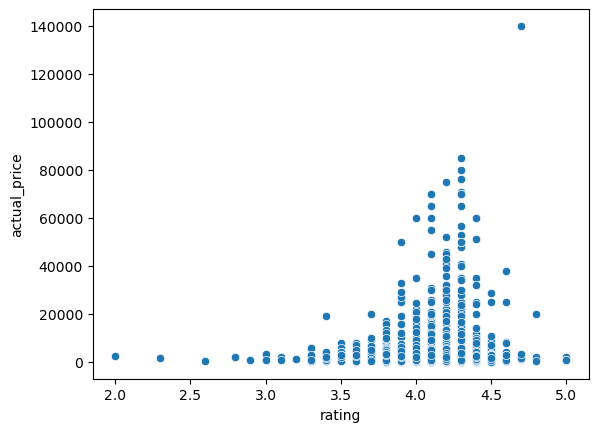

In [107]:
sns.scatterplot(df,x='rating',y='actual_price')

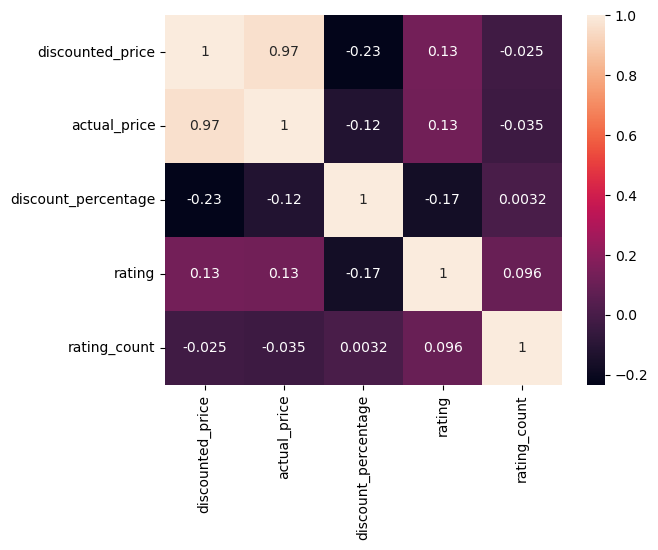

In [108]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Looking at the heatmap there doesn't seem to be any obvious correlation behind this. (actual - discount price doesn't give us any information beyond what we already know)<br>
Let's take a look at the products by category instead but first we need to split the categories into their different parts

In [109]:
categories = df['category'].str.split('|', expand=True)
categories

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1332,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1333,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1334,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1335,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


I think the first 2 categories are enough for some analysis as column 2 onwards gets more specific to the item

In [110]:
categories = categories.rename(columns={0:'cat_1', 1:'cat_2'})

In [111]:
categories.drop([2,3,4,5,6], axis=1, inplace=True)

In [112]:
df_backup = df.copy()

In [174]:
# df = df_backup.copy()

In [114]:
df = pd.concat([df.drop('category',axis=1), categories], axis=1)

In [115]:
print(f"{df['cat_1'].value_counts()} \n\n {df['cat_2'].value_counts()}")

cat_1
Electronics              476
Home&Kitchen             448
Computers&Accessories    375
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64 

 cat_2
Kitchen&HomeAppliances                     308
Accessories&Peripherals                    307
HomeTheater,TV&Video                       154
Mobiles&Accessories                        147
Heating,Cooling&AirQuality                 116
Headphones,Earbuds&Accessories              63
WearableTechnology                          54
NetworkingDevices                           30
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                             

In [116]:
for col in ['cat_1', 'cat_2']:
    df[col] = df[col].apply(lambda x: x.replace(',', ', ').replace('&', ' & '))
    
# Function to add space before uppercase letters only if preceded by an alphanumeric character
def add_space_before_uppercase(s):
    return re.sub(r'(?<=[0-9a-z])(?=[A-Z])', ' ', s)

# Apply the function to the 'cat_1' and 'cat_2' columns
df['cat_1'] = df['cat_1'].apply(add_space_before_uppercase)
df['cat_2'] = df['cat_2'].apply(add_space_before_uppercase)

In [117]:
group1 = df.groupby('cat_1')
group2 = df.groupby('cat_2')

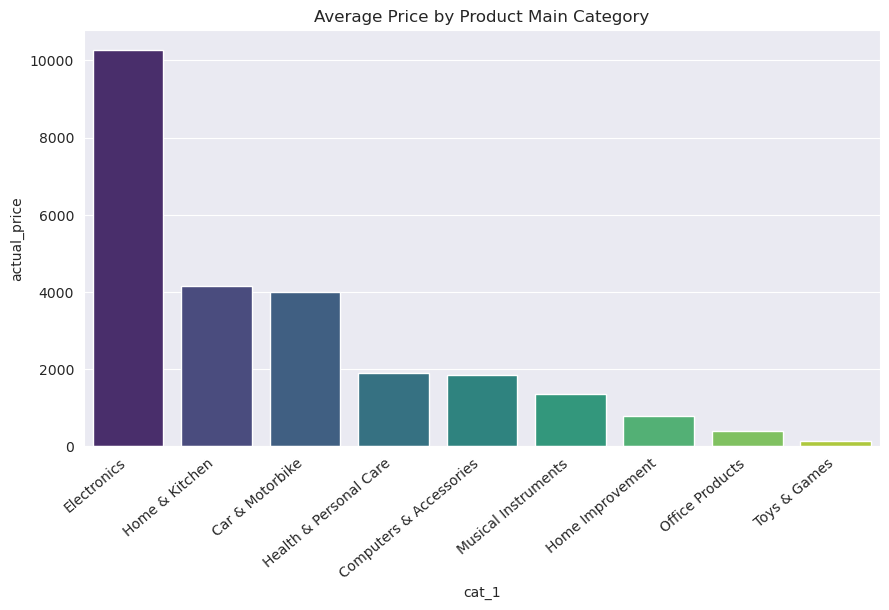

In [285]:
plt.figure(figsize=(9, 6))
sns.barplot(group1['actual_price'].mean().sort_values(ascending=False), palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.title('Average Price by Product Main Category')
plt.show()

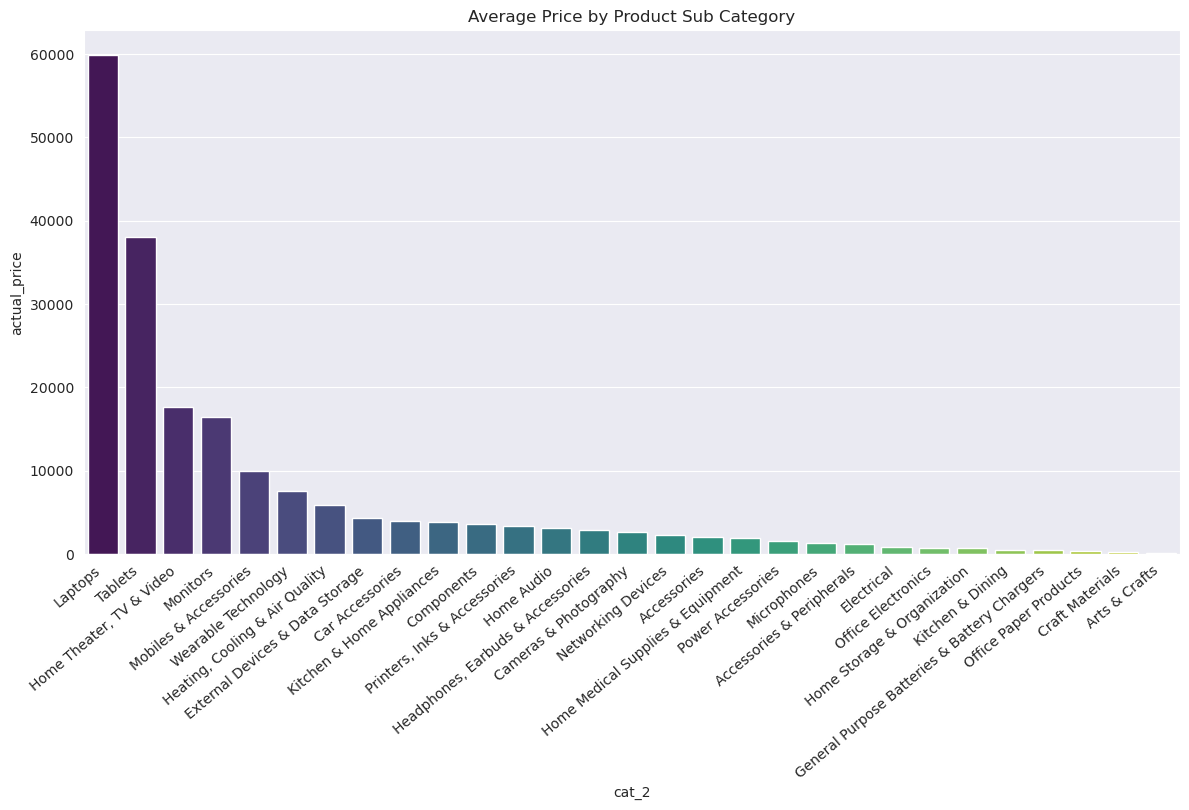

In [284]:
plt.figure(figsize=(12, 8))
sns.barplot(group2['actual_price'].mean().sort_values(ascending=False), palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.title('Average Price by Product Sub Category')
plt.show()

In [120]:
group1['rating_count'].sum().sort_values(ascending=False)

cat_1
Electronics                13938131
Computers & Accessories     6335179
Home & Kitchen              2991069
Office Products              149675
Musical Instruments           88882
Toys & Games                  15867
Home Improvement               8566
Health & Personal Care         3663
Car & Motorbike                1118
Name: rating_count, dtype: int64

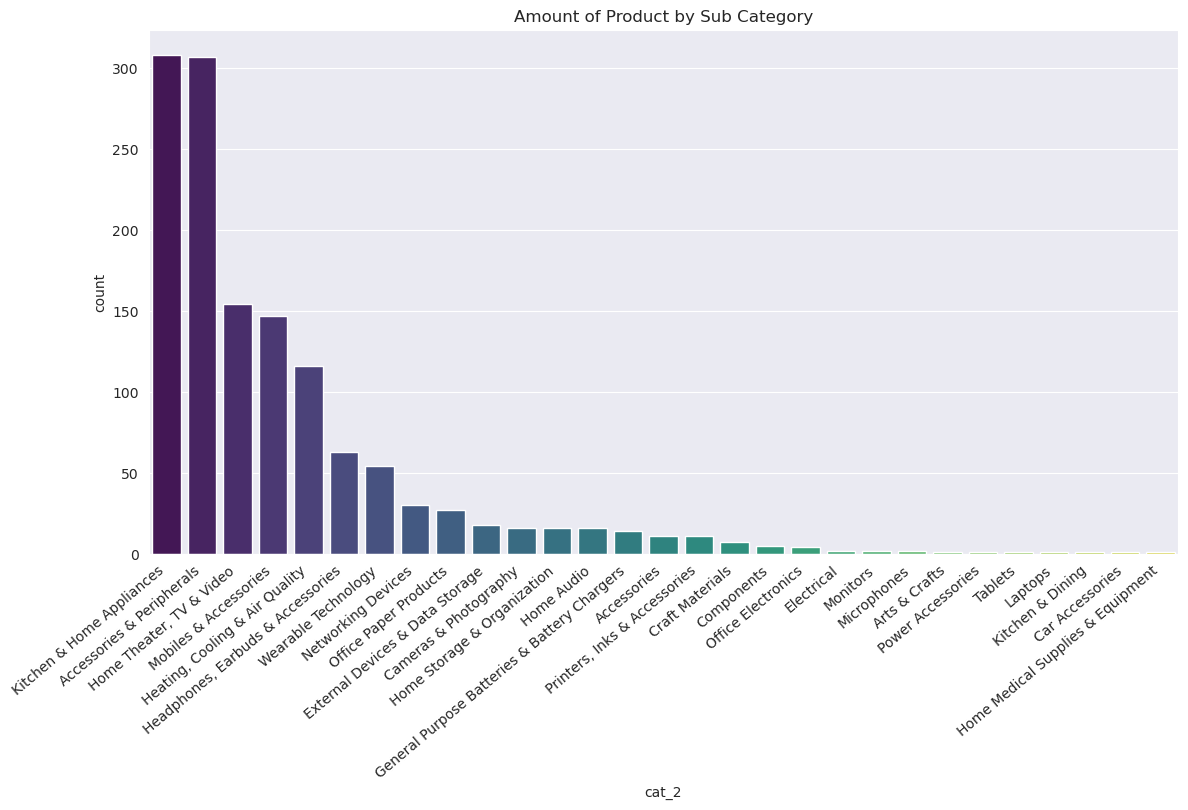

In [283]:
plt.figure(figsize=(12, 8))
sns.barplot(df['cat_2'].value_counts(), palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.title('Amount of Product by Sub Category')
plt.show()

This category definitely has some cross-over (i.e. microphones could be grouped with accessories and peripherals) but for now we'll leave these as is.

In [122]:
rating_score = []

for score in df['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [123]:
df['rating_score'] = rating_score
df['rating_score'] = df['rating_score'].astype('category')

We'll create a copy of the users, id's, and reviews for later sentiment analysis

In [124]:
users = df[['user_id','user_name']].copy()
reviews = df[['review_title', 'review_content']].copy()

In [125]:
for col in ['user_id','user_name']:
    users[col] = users[col].str.split(',')

In [126]:
users.set_index(df['product_id'], inplace=True)

In [146]:
users['user_id'].explode().value_counts()

user_id
AE55KTFVNXYFD5FPYWP2OUPEYNPQ    9
AG5DWPD54QGSLWJ6QUFERLPNAX4Q    9
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA    8
AEBWA5I4QFCA3P3OBEPMELBGN4GQ    8
AHMGAC6QM62UXNEOCZIHLHSXPP2Q    8
                               ..
AFDW67WRZ2IJI7LQQP47LWZJHHUA    1
AGXE6V4HYRRDGH33H3NE7PGF4D4Q    1
AEWMRL2WQK2553OVVG4CKRWSNYHA    1
AEWZXQYKDB6JJD653R4I3TOIJXHQ    1
AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ    1
Name: count, Length: 9036, dtype: int64

In [145]:
users['user_name'].explode().value_counts()

user_name
Amazon Customer    578
Placeholder         52
Kindle Customer     21
Rajesh              20
Arun                15
                  ... 
Muzammil Khan        1
Mr. Nøbødy           1
Rohan Magar          1
Sinu                 1
Saw a.               1
Name: count, Length: 7686, dtype: int64

#### It looks like there's an uneven amount of user names to ids. I think there won't be any useful data out of this so we'll drop this path of analysis

In [147]:
reviews

,review_title,review_content
0,"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i..."
1,"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's sti...
2,"Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for money,Working nice,it's a really nice product","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/61bKp9YO6wL...."
3,"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet","Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,O..."
4,"As good as original,Decent,Good one for secondary use,Best quality,GOOD,Amazing product at a mind blowing price!,Nice Quality,Good product","Bought this instead of original apple, does the work for 150rs, not as fast as apple charger but its a good option if you want cheap and good product, bought it for iPad pro 10.5 and it's working ..."
...,...,...
1332,"Received the product without spanner,Excellent product,Satisfactory,Good product,great product,performance yet to be checked?,Value for money,Good product","I received product without spanner,Excellent product,It's little spongy compared to my last purchased brand which was hard and not so spongy as this one.,Very good and easy to install,Comes in sep..."
1333,"ok,everything was good couldn't return bcoz I needed it in emergency,Don't buy this 1 litre Prestige rice cooker. Already replaced but still got damaged product,Ideal for a small family of two.,Ni...","ok,got everything as mentioned but the measuring cup was broken didn't expect this from amazon and as well as prestige. except this everything was good,I had a bad experience buying this Prestige ..."
1334,"very good,Work but front melt after 2 month,Good one,It is durable,Review.,DEFECTIVE PRODUCT,Nice product,Nice product","plastic but cool body ,u have to find sturdy surface to put it vertically , on plastic stool it vibrate in vertical position ,u need bigger plug point for it ,very fast and effective heating ,it t..."
1335,"Fan Speed is slow,Good quality,Good product,good,Old is gold.,Good product,Nice product,Super 💕","I have installed this in my kitchen working fine is just fan speed is very slow could have been faster but not it is slow thats the reason this exhaust smoke very slow but it does exhaust.,Good qu..."


#### The reviews seem to be split by commas but they could also be used within the reviews themselves. It may be worth analysing but without some way to match it to the individual reviewers and scores then it won't be possible to train our own model on this data

For now we'll just continue with the numeric data and see what information we can glean

## Data Visualisation

In [260]:
cat_df = df[['cat_1', 'cat_2', 'product_id']]

cat_df = cat_df.rename(columns={'cat_1' :'Main Category', 'cat_2' : 'Sub-Category', 'product_id':'Product ID'})

piv_df = pd.pivot_table(cat_df, index=['Main Category', 'Sub-Category'], aggfunc='count').sort_values(by=['Main Category', 'Product ID'], ascending=[True,False])

piv_df

Product ID  \
Main Category           Sub-Category                                               
Car & Motorbike         Car Accessories                                        1   
Computers & Accessories Accessories & Peripherals                            307   
                        Networking Devices                                    30   
                        External Devices & Data Storage                       18   
                        Printers, Inks & Accessories                          11   
                        Components                                             5   
                        Monitors                                               2   
                        Laptops                                                1   
                        Tablets                                                1   
Electronics             Home Theater, TV & Video                             154   
                        Mobiles & Accessories                                147   
                        Headphones, Earbuds & Accessories                     63   
                        Wearable Technology                                   54   
                        Cameras & Photography                                 16   
                        Home Audio                                            16   
                        General Purpose Batteries & Battery Chargers          14   
                        Accessories                                           11   
                        Power Accessories                                      1   
Health & Personal Care  Home Medical Supplies & Equipment                      1   
Home & Kitchen          Kitchen & Home Appliances                            308   
                        Heating, Cooling & Air Quality                       116   
                        Home Storage & Organization                           16   
                        Craft Materials                                        7   
                        Kitchen & Dining                                       1   
Home Improvement        Electrical                                             2   
Musical Instruments     Microphones                                            2   
Office Products         Office Paper Products                                 27   
                        Office Electronics                                     4   
Toys & Games            Arts & Crafts                                          1   

                                                                      rating  
Main Category           Sub-Category                                          
Car & Motorbike         Car Accessories                                    1  
Computers & Accessories Accessories & Peripherals                        307  
                        Networking Devices                                30  
                        External Devices & Data Storage                   18  
                        Printers, Inks & Accessories                      11  
                        Components                                         5  
                        Monitors                                           2  
                        Laptops                                            1  
                        Tablets                                            1  
Electronics             Home Theater, TV & Video                         154  
                        Mobiles & Accessories                            147  
                        Headphones, Earbuds & Accessories                 63  
                        Wearable Technology                               54  
                        Cameras & Photography                             16  
                        Home Audio                                        16  
                        General Purpose Batteries & Battery Chargers      14  
                        Accessories        

In [213]:
top_products = df.sort_values('actual_price', ascending=False).head(10)

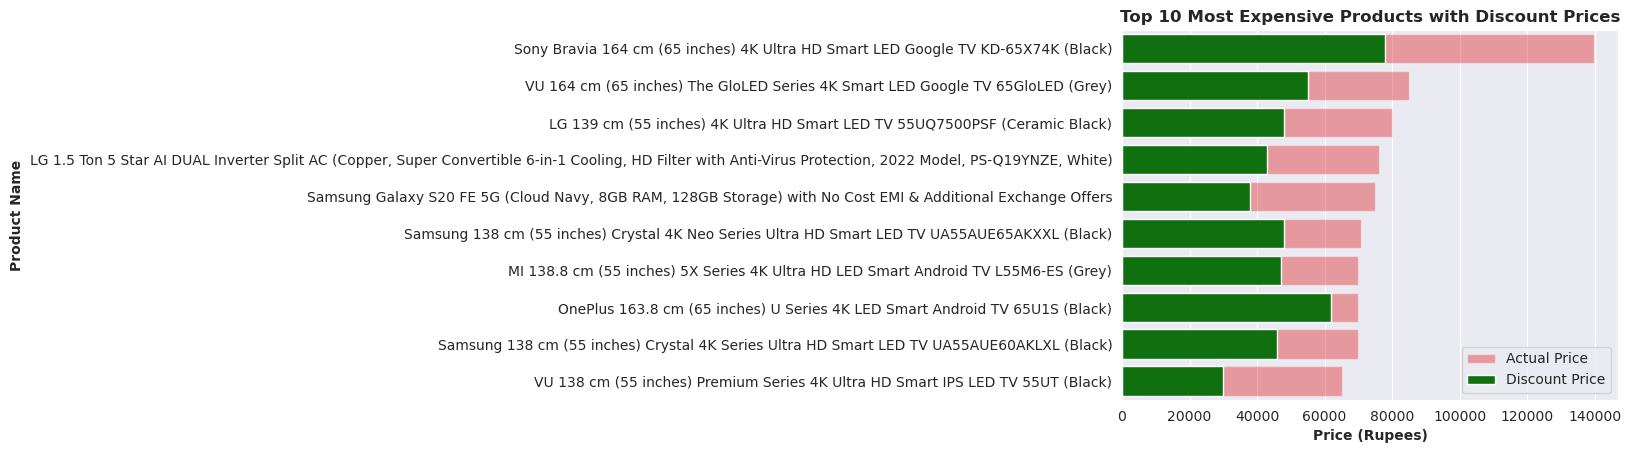

In [226]:
sns.barplot(data=top_products, x='actual_price', y='product_name', alpha=0.4,  label='Actual Price', color='red')

sns.barplot(data=top_products, x='discounted_price', y='product_name', label='Discount Price', color='green')

plt.xlabel('Price (Rupees)', fontweight='bold')
plt.ylabel('Product Name', fontweight='bold')
plt.title('Top 10 Most Expensive Products with Discount Prices', fontweight='bold')

plt.legend()

plt.show()

Text(0.5, 1.0, 'Main Category Rating Distributions')

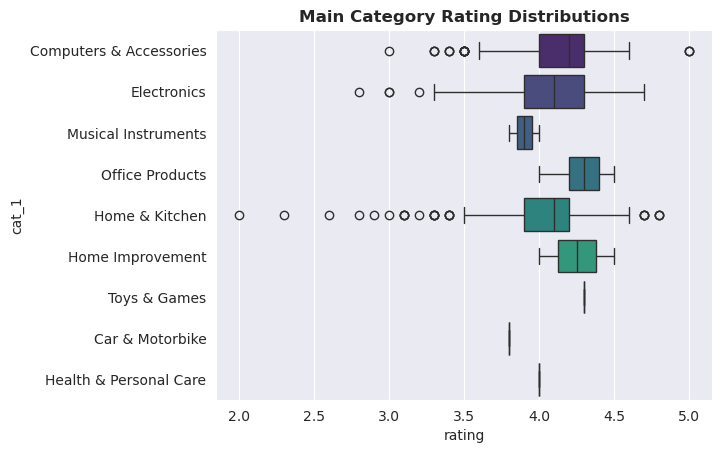

In [286]:
sns.boxplot(df, x='rating', y='cat_1',palette='viridis')
plt.title('Main Category Rating Distributions', fontweight='bold')

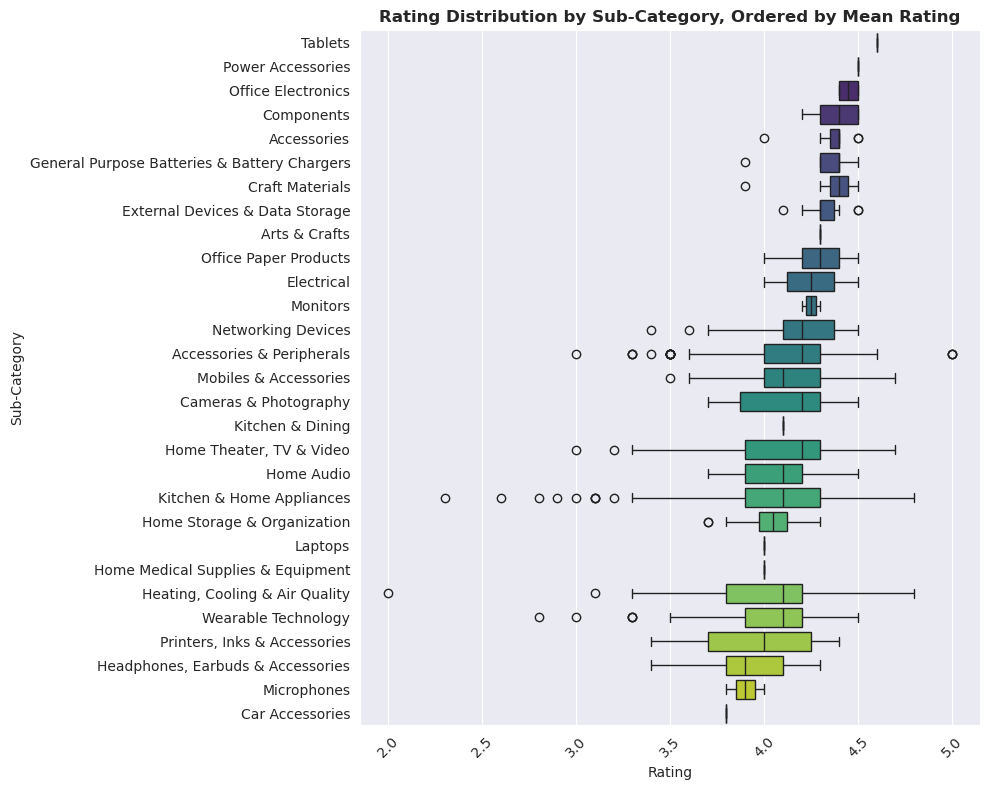

In [287]:
cat_df = df[['cat_1', 'cat_2', 'product_id','rating']]

cat_df = cat_df.rename(columns={'cat_1' :'Main Category', 'cat_2' : 'Sub-Category', 'product_id':'Product ID', 'rating':'Rating'})

# Calculate the mean ratings for each combined category
mean_ratings = cat_df.groupby('Sub-Category')['Rating'].mean().reset_index(name='Mean Rating')

# Sort the mean ratings in descending order
mean_ratings = mean_ratings.sort_values(by='Mean Rating', ascending=False)

# Use the sorted order of combined categories for the plotting
sorted_categories = mean_ratings['Sub-Category']

# Now, create the boxplot using the sorted categories for the y-axis
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.boxplot(data=cat_df, x='Rating', y='Sub-Category', order=sorted_categories, palette='viridis')
plt.title('Rating Distribution by Sub-Category, Ordered by Mean Rating', fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Sub-Category')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the layout to make sure everything fits
plt.show()